In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [86]:
df=pd.read_csv("C:/Users/Dell/Downloads/python-Personalized_Marketing_Dataset_Renamed.csv")
df

,Customer_ID,Order_ID,Order_Date,Last Purchase Gap,Total Orders,Lifetime Spend,Campaign_Type,Campaign_Engagement,Discount_Amount,Review_Rating,Payment_Method
0,CUST_3271,ORD_1,2023-01-01,364,11,31339.52,Medium Discount,No,105.52,3,Debit Card
1,CUST_2904,ORD_2,2023-01-01,364,9,24382.56,High Discount,No,182.41,1,Cash on Delivery
2,CUST_2738,ORD_3,2023-01-01,364,10,26992.29,High Discount,Yes,164.42,4,Cash on Delivery
3,CUST_3645,ORD_4,2023-01-01,364,13,49988.04,Low Discount,No,84.85,1,Net Banking
4,CUST_192,ORD_5,2023-01-01,364,9,24436.24,Low Discount,No,55.42,5,Net Banking
...,...,...,...,...,...,...,...,...,...,...,...
49995,CUST_4965,ORD_49996,2023-12-30,1,11,27760.14,Medium Discount,No,141.86,3,Net Banking
49996,CUST_3830,ORD_49997,2023-12-30,1,3,12355.17,High Discount,Yes,159.46,5,Cash on Delivery
49997,CUST_2768,ORD_49998,2023-12-30,1,8,27659.17,Low Discount,No,51.66,3,Credit Card
49998,CUST_1327,ORD_49999,2023-12-30,1,16,34446.26,High Discount,No,183.30,3,Credit Card


In [87]:

null = df.isnull().sum()
null


Customer_ID            0
Order_ID               0
Order_Date             0
Last Purchase Gap      0
Total Orders           0
Lifetime Spend         0
Campaign_Type          0
Campaign_Engagement    0
Discount_Amount        0
Review_Rating          0
Payment_Method         0
dtype: int64

In [88]:
duplicate = df.duplicated().sum()
duplicate


0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          50000 non-null  object 
 1   Order_ID             50000 non-null  object 
 2   Order_Date           50000 non-null  object 
 3   Last Purchase Gap    50000 non-null  int64  
 4   Total Orders         50000 non-null  int64  
 5   Lifetime Spend       50000 non-null  float64
 6   Campaign_Type        50000 non-null  object 
 7   Campaign_Engagement  50000 non-null  object 
 8   Discount_Amount      50000 non-null  float64
 9   Review_Rating        50000 non-null  int64  
 10  Payment_Method       50000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [90]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],errors='coerce')
df.dtypes

Customer_ID                    object
Order_ID                       object
Order_Date             datetime64[ns]
Last Purchase Gap               int64
Total Orders                    int64
Lifetime Spend                float64
Campaign_Type                  object
Campaign_Engagement            object
Discount_Amount               float64
Review_Rating                   int64
Payment_Method                 object
dtype: object

In [91]:
# Dropping 'Customer_ID' and 'Order_ID' 
df = df.drop(columns=['Customer_ID', 'Order_ID'])
df


,Order_Date,Last Purchase Gap,Total Orders,Lifetime Spend,Campaign_Type,Campaign_Engagement,Discount_Amount,Review_Rating,Payment_Method
0,2023-01-01,364,11,31339.52,Medium Discount,No,105.52,3,Debit Card
1,2023-01-01,364,9,24382.56,High Discount,No,182.41,1,Cash on Delivery
2,2023-01-01,364,10,26992.29,High Discount,Yes,164.42,4,Cash on Delivery
3,2023-01-01,364,13,49988.04,Low Discount,No,84.85,1,Net Banking
4,2023-01-01,364,9,24436.24,Low Discount,No,55.42,5,Net Banking
...,...,...,...,...,...,...,...,...,...
49995,2023-12-30,1,11,27760.14,Medium Discount,No,141.86,3,Net Banking
49996,2023-12-30,1,3,12355.17,High Discount,Yes,159.46,5,Cash on Delivery
49997,2023-12-30,1,8,27659.17,Low Discount,No,51.66,3,Credit Card
49998,2023-12-30,1,16,34446.26,High Discount,No,183.30,3,Credit Card


In [92]:
# Step 7: Check for outliers using statistical summaries
num_col = ['Last Purchase Gap', 'Total Orders', 'Lifetime Spend', 'Discount_Amount', 'Review_Rating']
num_col


['Last Purchase Gap',
 'Total Orders',
 'Lifetime Spend',
 'Discount_Amount',
 'Review_Rating']

In [93]:
df[num_col].describe()

,Last Purchase Gap,Total Orders,Lifetime Spend,Discount_Amount,Review_Rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,182.499980,10.981760,32454.972771,100.512989,3.001940
std,105.080466,3.149417,12437.685909,57.689413,1.416028
min,0.000000,1.000000,1195.830000,0.010000,1.000000
25%,91.750000,9.000000,23513.697500,50.905000,2.000000
50%,182.500000,11.000000,31397.100000,101.140000,3.000000
75%,273.250000,13.000000,40080.350000,150.230000,4.000000
max,364.000000,25.000000,95338.710000,199.990000,5.000000


In [94]:
df

,Order_Date,Last Purchase Gap,Total Orders,Lifetime Spend,Campaign_Type,Campaign_Engagement,Discount_Amount,Review_Rating,Payment_Method
0,2023-01-01,364,11,31339.52,Medium Discount,No,105.52,3,Debit Card
1,2023-01-01,364,9,24382.56,High Discount,No,182.41,1,Cash on Delivery
2,2023-01-01,364,10,26992.29,High Discount,Yes,164.42,4,Cash on Delivery
3,2023-01-01,364,13,49988.04,Low Discount,No,84.85,1,Net Banking
4,2023-01-01,364,9,24436.24,Low Discount,No,55.42,5,Net Banking
...,...,...,...,...,...,...,...,...,...
49995,2023-12-30,1,11,27760.14,Medium Discount,No,141.86,3,Net Banking
49996,2023-12-30,1,3,12355.17,High Discount,Yes,159.46,5,Cash on Delivery
49997,2023-12-30,1,8,27659.17,Low Discount,No,51.66,3,Credit Card
49998,2023-12-30,1,16,34446.26,High Discount,No,183.30,3,Credit Card


In [95]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object', 'category']).columns


In [96]:
num_col

Index(['Last Purchase Gap', 'Total Orders', 'Lifetime Spend',
       'Discount_Amount', 'Review_Rating'],
      dtype='object')

In [97]:
cat_col

Index(['Campaign_Type', 'Campaign_Engagement', 'Payment_Method'], dtype='object')

In [98]:
#Univariate Analysis(Numerical Columns)

num_col = ['Last Purchase Gap', 'Total Orders', 'Lifetime Spend', 'Discount_Amount', 'Review_Rating']
df[num_col].describe()



,Last Purchase Gap,Total Orders,Lifetime Spend,Discount_Amount,Review_Rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,182.499980,10.981760,32454.972771,100.512989,3.001940
std,105.080466,3.149417,12437.685909,57.689413,1.416028
min,0.000000,1.000000,1195.830000,0.010000,1.000000
25%,91.750000,9.000000,23513.697500,50.905000,2.000000
50%,182.500000,11.000000,31397.100000,101.140000,3.000000
75%,273.250000,13.000000,40080.350000,150.230000,4.000000
max,364.000000,25.000000,95338.710000,199.990000,5.000000


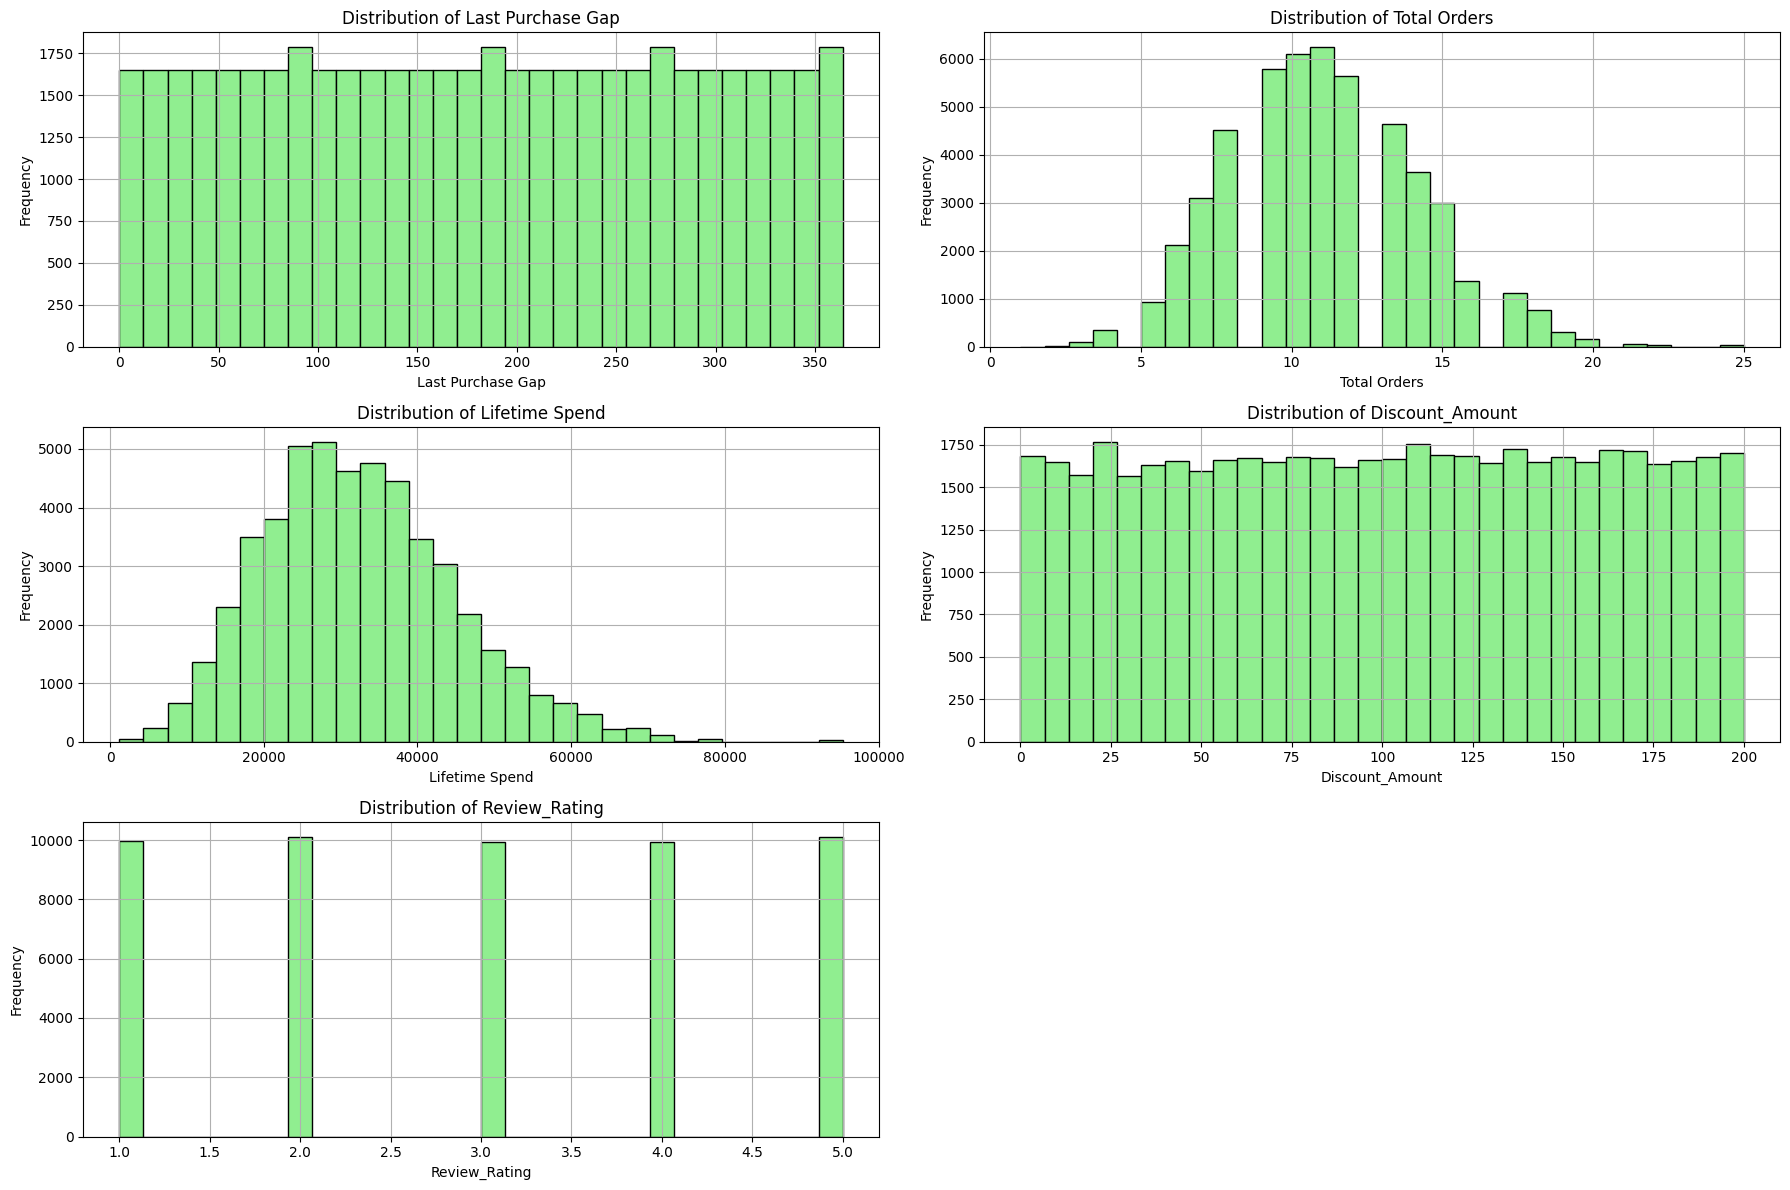

In [99]:

plt.figure(figsize=(18, 12))
for i, column in enumerate(num_col, 1):
    plt.subplot(3,2,i)
    df[column].hist(bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [100]:
#Insights 
#Last Purchase Gap>>Uniformly distributed range (0 to 364 days).

#Lifetime Spend>>Right-skewed distribution tells about a few outliers are there and high spending.

#Total Orders>>Most customers have placed 8 to 14 orders max being 25.

#Review Rating>>Uniform distribution of ratings from 1 to 5.

#Discount Amount>>uniform distribution between $0 and $200.


In [101]:
#Univariate Analysis(categorical column)

In [102]:
cat_col = ['Campaign_Engagement', 'Campaign_Type', 'Payment_Method']
cat_freq = {col: df[col].value_counts() for col in cat_col}
cat_freq

{'Campaign_Engagement': Campaign_Engagement
 No     39979
 Yes    10021
 Name: count, dtype: int64,
 'Campaign_Type': Campaign_Type
 Low Discount       25002
 Medium Discount    12501
 High Discount      12497
 Name: count, dtype: int64,
 'Payment_Method': Payment_Method
 Cash on Delivery    10199
 UPI                 10095
 Net Banking         10009
 Debit Card           9972
 Credit Card          9725
 Name: count, dtype: int64}

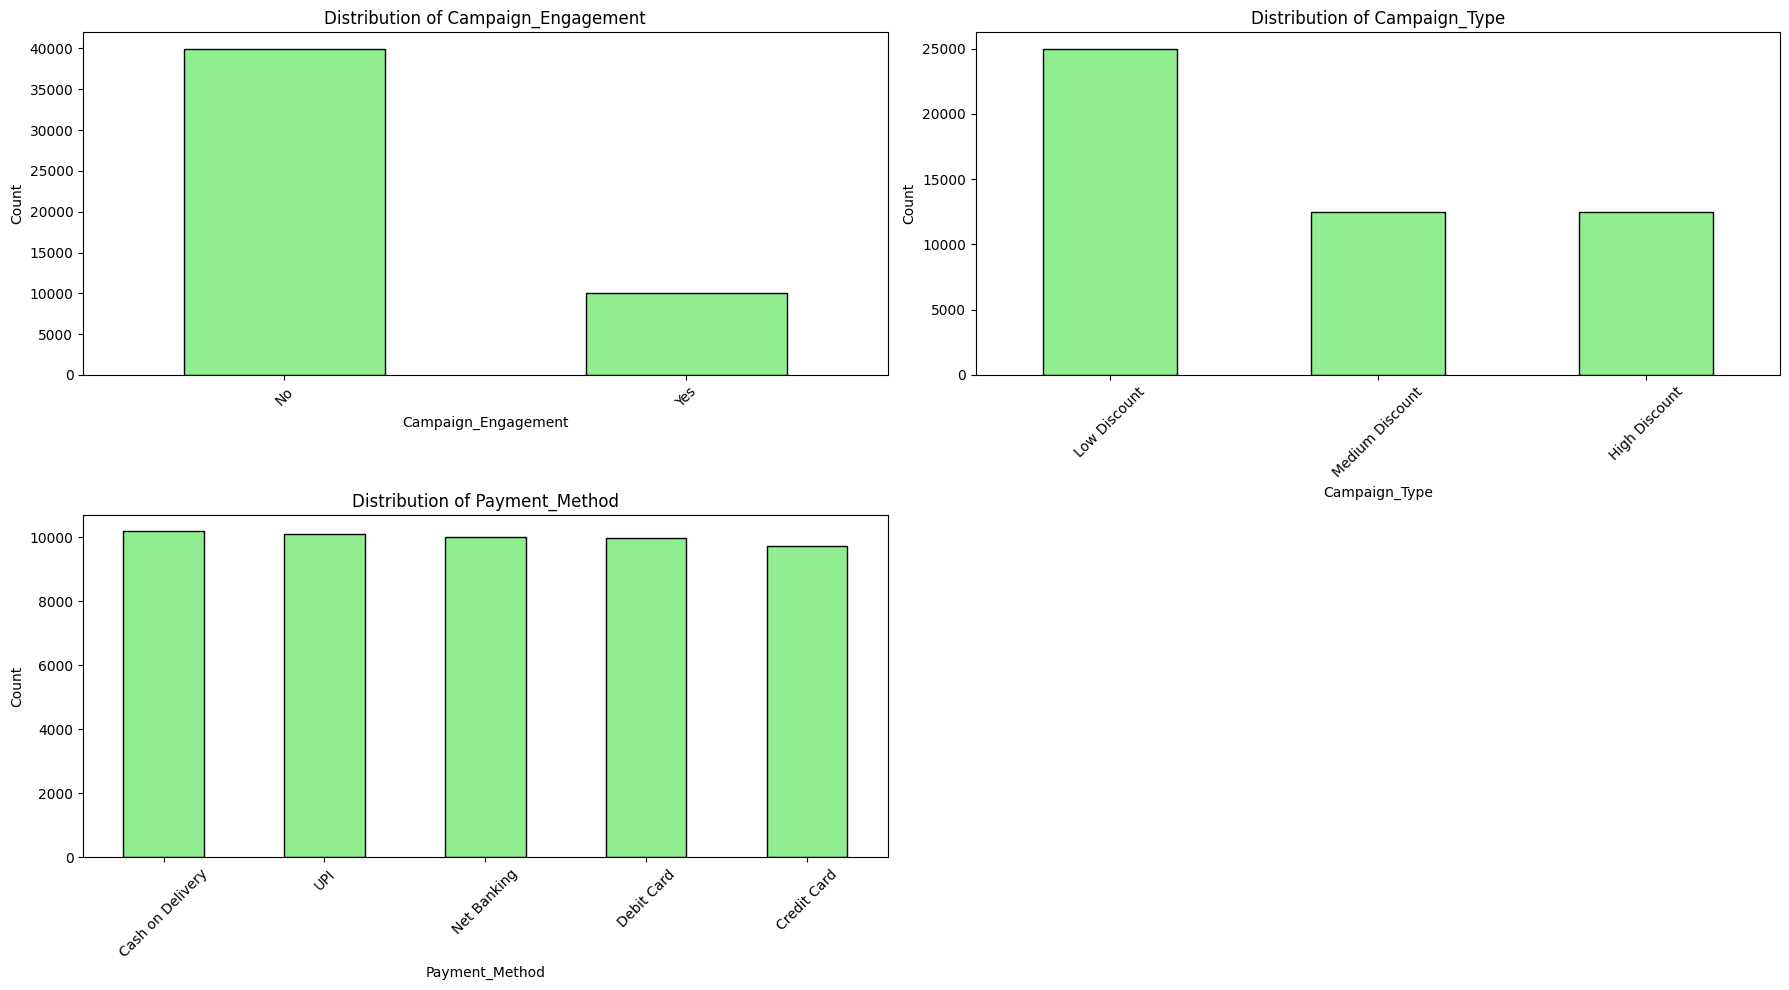

In [103]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    df[column].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
#Insights>> the "Low Discount" type are the most high in campaign type.
#80% did not engage in the campaign.
#payment method distribution is same for all type of methods.


In [105]:
#Bivariate Analysis(Numerical Columns)

In [106]:
#Scatter Plots

df['Campaign_Engagement'] = df['Campaign_Engagement'].map({'Yes': 1, 'No': 0})
df['Campaign_Engagement']

0        0
1        0
2        1
3        0
4        0
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: Campaign_Engagement, Length: 50000, dtype: int64

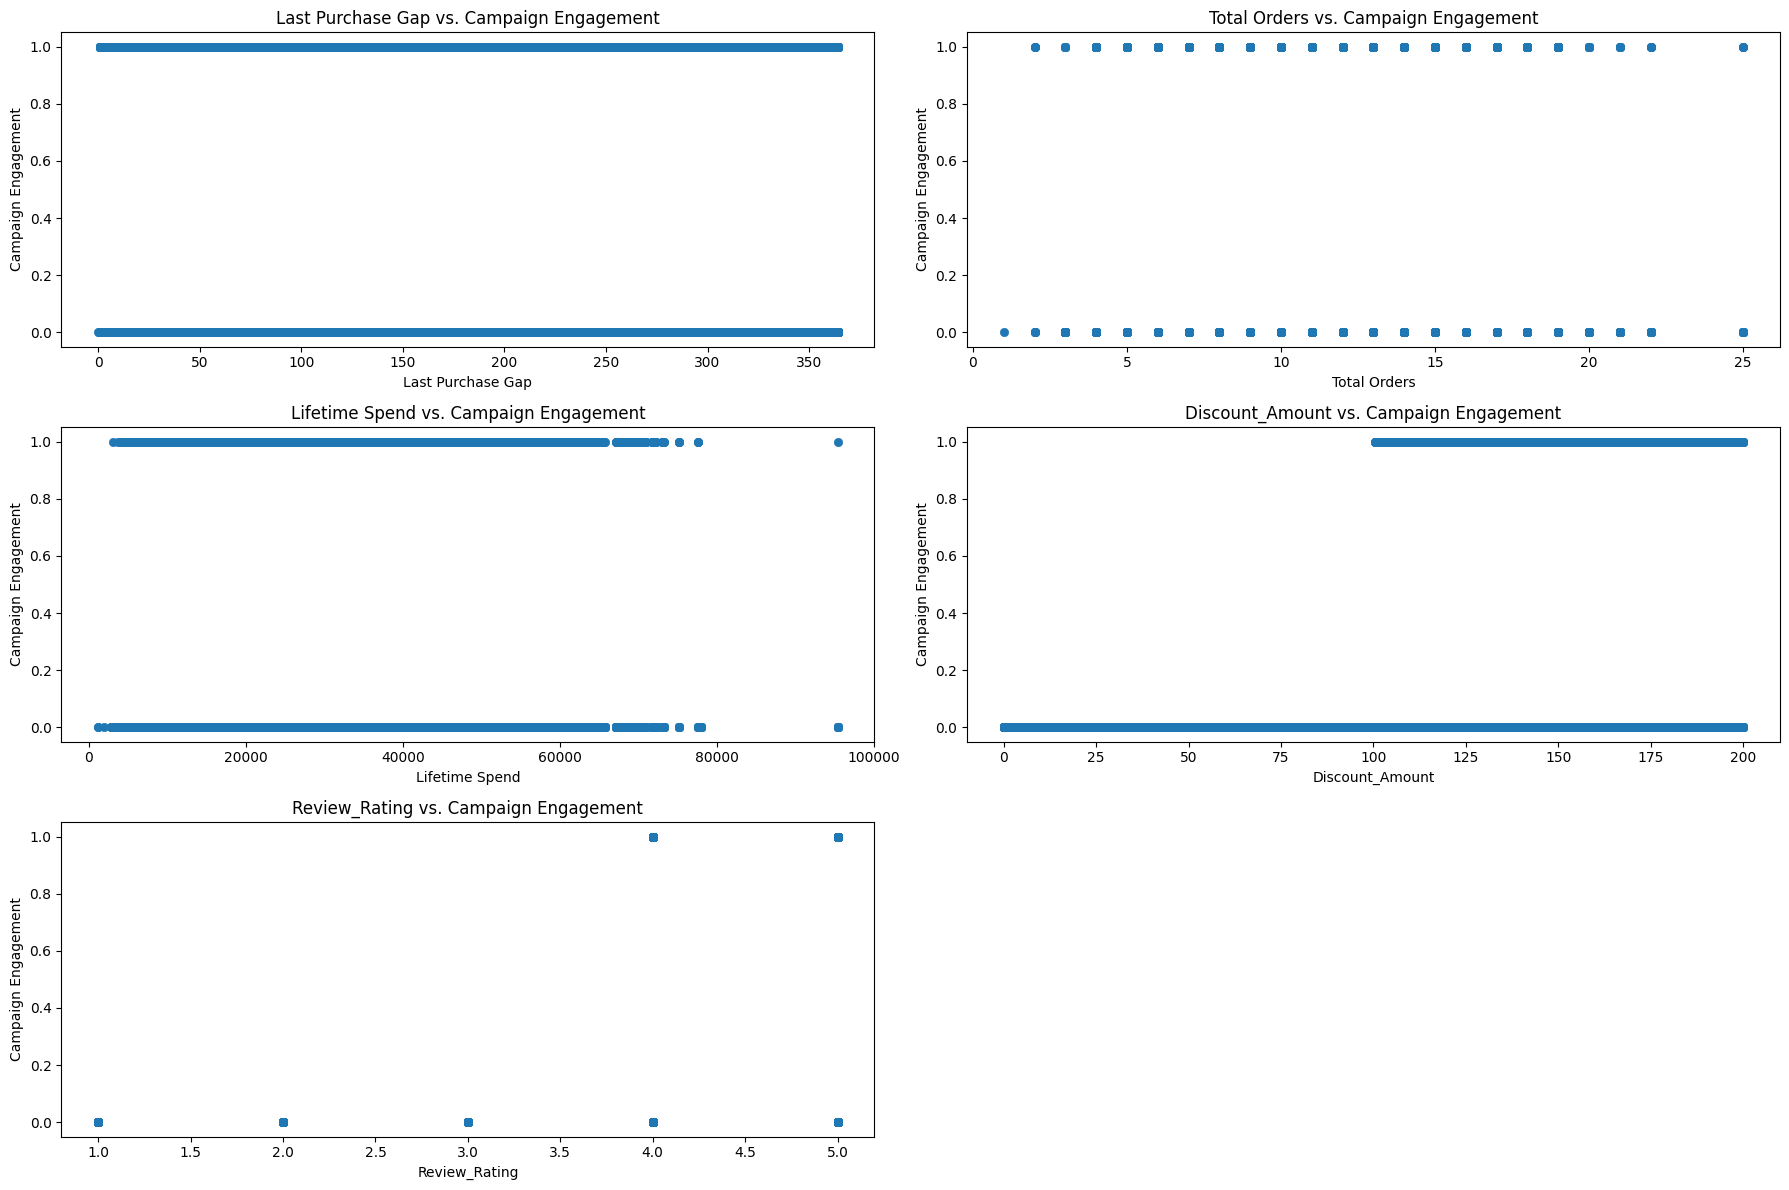

In [107]:
num_col = ['Last Purchase Gap', 'Total Orders', 'Lifetime Spend', 'Discount_Amount', 'Review_Rating']

plt.figure(figsize=(18, 12))

for i, column in enumerate(num_col, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[column], y=df['Campaign_Engagement'], edgecolor=None)
    plt.title(f'{column} vs. Campaign Engagement')
    plt.xlabel(column)
    plt.ylabel('Campaign Engagement')

plt.tight_layout()

plt.show()

In [108]:

camp_ct = pd.crosstab(df['Campaign_Type'], df['Campaign_Engagement'])
camp_ct



Campaign_Engagement,0,1
Campaign_Type,,
High Discount,7505,4992
Low Discount,24955,47
Medium Discount,7519,4982


<Figure size 1000x600 with 0 Axes>

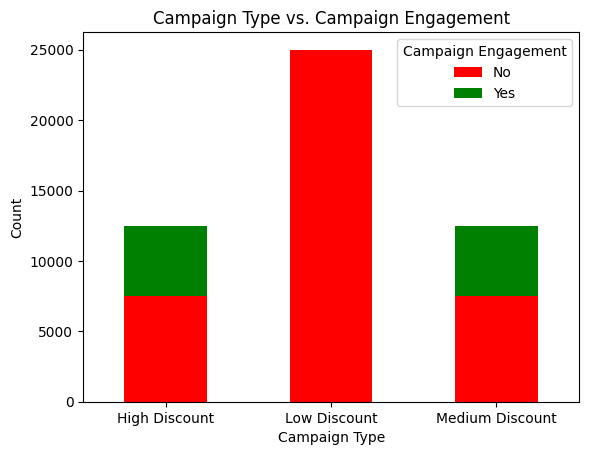

In [109]:

plt.figure(figsize=(10, 6))
camp_ct.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Campaign Type vs. Campaign Engagement')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Campaign Engagement', labels=['No', 'Yes'])
plt.show()



In [110]:
camp_paymnt_ct = pd.crosstab(df['Campaign_Type'], df['Payment_Method'])
camp_paymnt_ct

Payment_Method,Cash on Delivery,Credit Card,Debit Card,Net Banking,UPI
Campaign_Type,,,,,
High Discount,2495,2499,2480,2438,2585
Low Discount,5265,4793,4978,5022,4944
Medium Discount,2439,2433,2514,2549,2566


<Figure size 1000x600 with 0 Axes>

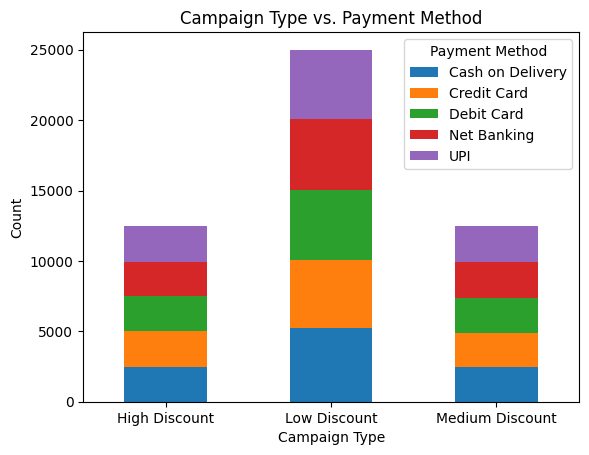

In [111]:
plt.figure(figsize=(10, 6))
camp_paymnt_ct.plot(kind='bar', stacked=True)
plt.title('Campaign Type vs. Payment Method')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

In [112]:
#Insights>>The stacked bar charts indicate
#The first chart shows High and Medium Discounts get more yes campaign engagements.
#The second chart shows different payment method being consistent in every campaign type.

In [113]:
df['Campaign_Engagement']

0        0
1        0
2        1
3        0
4        0
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: Campaign_Engagement, Length: 50000, dtype: int64

In [114]:
#Model Building
# Based on EDA , selecting the features for modeling

feat = ['Total Orders', 'Lifetime Spend', 'Discount_Amount', 'Review_Rating']
cat_feat = ['Campaign_Type', 'Payment_Method']

In [115]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=cat_feat, drop_first=True)

In [116]:
df.head()

,Order_Date,Last Purchase Gap,Total Orders,Lifetime Spend,Campaign_Engagement,Discount_Amount,Review_Rating,Campaign_Type_Low Discount,Campaign_Type_Medium Discount,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI
0,2023-01-01,364,11,31339.52,0,105.52,3,False,True,False,True,False,False
1,2023-01-01,364,9,24382.56,0,182.41,1,False,False,False,False,False,False
2,2023-01-01,364,10,26992.29,1,164.42,4,False,False,False,False,False,False
3,2023-01-01,364,13,49988.04,0,84.85,1,True,False,False,False,True,False
4,2023-01-01,364,9,24436.24,0,55.42,5,True,False,False,False,True,False


In [117]:
#Scaling and splitting the data into training and testing sets

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scaling
scaler = StandardScaler()
df[feat] = scaler.fit_transform(df[feat])

In [119]:
df[feat]

,Total Orders,Lifetime Spend,Discount_Amount,Review_Rating
0,0.005792,-0.089684,0.086793,-0.001370
1,-0.629253,-0.649035,1.419634,-1.413785
2,-0.311731,-0.439209,1.107788,0.704838
3,0.640836,1.409687,-0.271508,-1.413785
4,-0.629253,-0.644719,-0.781659,1.411045
...,...,...,...,...
49995,0.005792,-0.377472,0.716725,-0.001370
49996,-2.534387,-1.616057,1.021810,1.411045
49997,-0.946775,-0.385590,-0.846836,-0.001370
49998,1.593403,0.160103,1.435061,-0.001370


In [120]:
# Splitting the data into training and testing sets
X = df.drop([ 'Order_Date', 'Campaign_Engagement', 'Last Purchase Gap'], axis=1)
y = df['Campaign_Engagement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 10), (10000, 10), (40000,), (10000,))

In [122]:
#MODEL TRAINING AND EVALUATION
#Starting with Logistic Regression as a base. 

#Then test more advanced models like Random Forest and Gradient Boosting  to improve performance.

#These models are chosen becoause  they are widely used for binary classification and
# handle both linear and non-linear relationships really well.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


log_model = LogisticRegression(random_state=1, max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=1)

In [124]:

y_pred = log_model.predict(X_test)
y_pred



array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [125]:
y_prd_prob = log_model.predict_proba(X_test)[:, 1]
y_prd_prob

array([3.98011672e-07, 1.26896684e-06, 9.67701180e-15, ...,
       1.58167803e-06, 9.94724517e-01, 1.12611307e-14])

In [126]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[7968,    0],
       [  10, 2022]], dtype=int64)

In [127]:
#True Negatives:7968 ,False Positives:0
#False Negatives: 10, True Positives: 2022

#model performs well

In [128]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)

df_classification = pd.DataFrame(classification_rep).transpose()
df_classification


,precision,recall,f1-score,support
0,0.998747,1.000000,0.999373,7968.000
1,1.000000,0.995079,0.997533,2032.000
accuracy,0.999000,0.999000,0.999000,0.999
macro avg,0.999373,0.997539,0.998453,10000.000
weighted avg,0.999001,0.999000,0.998999,10000.000


In [129]:
#Precision: The model is highly precise (approx.1.00), meaning it makes very few false positive errors.

#Recall: The recall is slightly lower for Class 1 (0.995), indicating a few false negatives but good performance.

#both precision and recall are high.

#F1-Score: the F1-score is also almost perfect which shows a well-balanced model. 

In [130]:
roc_auc = roc_auc_score(y_test, y_prd_prob)
roc_auc

0.9997508488679125

In [131]:
#The ROC AUC score of 0.9998 signifies an almost perfect model

#the model can entirely distinguish between the positive and negative classes with minimal errors.

In [132]:
#Logistic Regression model performs quite well on the dataset. 

#this might also indicate overfitting due to the good results.

In [133]:
# training and evaluating the Random Forest and Gradient Boosting models

In [134]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [135]:
rf_mod = RandomForestClassifier(n_estimators=100, random_state=1)
rf_mod.fit(X_train, y_train)



RandomForestClassifier(random_state=1)

In [136]:
y_prd_rf = rf_mod.predict(X_test)
y_prd_prob_rf = rf_mod.predict_proba(X_test)[:, 1]


In [137]:
conf_mat_rf = confusion_matrix(y_test, y_prd_rf)
class_rep_rf = classification_report(y_test, y_prd_rf)
roc_auc_rf = roc_auc_score(y_test, y_prd_prob_rf)


In [138]:
gb_mod = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb_mod.fit(X_train, y_train)


GradientBoostingClassifier(random_state=1)

In [139]:
y_prd_gb = gb_mod.predict(X_test)
y_prd_prob_gb = gb_mod.predict_proba(X_test)[:, 1]


In [140]:
conf_mat_gb = confusion_matrix(y_test, y_prd_gb)
class_rep_gb = classification_report(y_test, y_prd_gb)
roc_auc_gb = roc_auc_score(y_test, y_prd_prob_gb)

In [142]:
df_results = pd.DataFrame({
    "Metric": ["Confusion Matrix", "Classification Report", "ROC AUC Score"],
    "Random Forest": [conf_mat_rf, class_rep_rf, roc_auc_rf],
    "Gradient Boosting": [conf_mat_gb, class_rep_gb, roc_auc_gb]
})


In [151]:
df_results

,Metric,Random Forest,Gradient Boosting
0,Confusion Matrix,"[[7968, 0], [0, 2032]]","[[7968, 0], [0, 2032]]"
1,Classification Report,precision recall f1-score ...,precision recall f1-score ...
2,ROC AUC Score,1.0,1.0


In [156]:
#Comparing random forest and gradient boosting
#confusion matrix
conf_matrix_rf = df_results.iloc[0, 1]
conf_matrix_gb = df_results.iloc[0, 2]  
conf_matrix_rf


array([[7968,    0],
       [   0, 2032]], dtype=int64)

In [155]:
conf_matrix_gb

array([[7968,    0],
       [   0, 2032]], dtype=int64)

In [158]:
#classification report
class_report_rf = df_results.iloc[1, 1]  
class_report_gb = df_results.iloc[1, 2]

class_rep_rf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7968\n           1       1.00      1.00      1.00      2032\n\n    accuracy                           1.00     10000\n   macro avg       1.00      1.00      1.00     10000\nweighted avg       1.00      1.00      1.00     10000\n'

In [159]:
class_rep_gb

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      7968\n           1       1.00      1.00      1.00      2032\n\n    accuracy                           1.00     10000\n   macro avg       1.00      1.00      1.00     10000\nweighted avg       1.00      1.00      1.00     10000\n'

In [160]:
#roc auc score
roc_auc_rf = df_results.iloc[2, 1]  
roc_auc_gb = df_results.iloc[2, 2] 

roc_auc_rf

1.0

In [161]:
roc_auc_gb

1.0

In [163]:
#Analysis of Results
#Both models have 100% accuracy, recall, and precision

#the objective to predict customer engagement based on historical data was successfully achieved.

#ML Workflow
#Data Preprocessing (handling missing values, encoding, scaling)
#EDA (univariate, bivariate analysis) 
#Model Building (Logistic Regression, Random Forest, Gradient Boosting) 
#Model Evaluation (confusion matrix, classification report, ROC AUC) 

In [168]:
#Predictions About Customer Engagement Based on Model Evaluations
#Review ratings , campaign type(low ,med ,high discount) and lifetime spend are the major contributors 
#driving the  campaign engagement

#INSIGHT
#Business should focus on customer feedback and targeted discounts and purchasing power of the customer to boost engagement